Peak Sneakers Month: 2022-06 — $13,545.94
Peak Streetwear Month: 2022-03 — $10,227.56


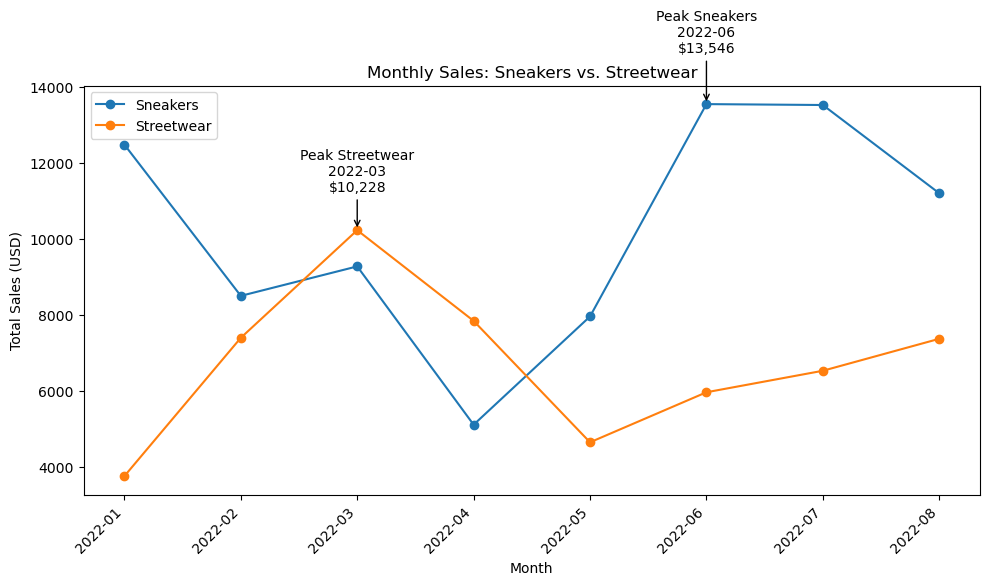

In [2]:
# "Which months have the highest sales for sneakers vs. streetwear?"

import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1) Load and clean the data
# ---------------------------

# Read the CSV file (update the path if needed)
csv_path = "sneakers_streetwear_sales_data.csv"
df = pd.read_csv(csv_path)

# Parse the 'Date' column into datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop rows where the Date couldn't be parsed
df = df.dropna(subset=["Date"])

# We'll use 'Amount ($)' for total sales
sales_col = "Amount ($)"
if sales_col not in df.columns:
    raise KeyError(f"Expected column '{sales_col}' not found in dataset.")

# -----------------------------------------------
# 2) Build monthly totals for Sneakers vs Streetwear
# -----------------------------------------------

# Create a 'Month' column in YYYY-MM format
df["Month"] = df["Date"].dt.to_period("M").astype(str)

# Total sales per month for Sneakers (Product Type filter)
sneakers_monthly = (
    df[df["Product Type"].str.strip().str.lower() == "sneakers"]
    .groupby("Month")[sales_col]
    .sum()
    .sort_index()
)

# Total sales per month for Streetwear (Category filter)
streetwear_monthly = (
    df[df["Category"].str.strip().str.lower() == "streetwear"]
    .groupby("Month")[sales_col]
    .sum()
    .sort_index()
)

# Combine both series so they have the same months
all_months = sorted(set(sneakers_monthly.index).union(streetwear_monthly.index))
sneakers_monthly = sneakers_monthly.reindex(all_months, fill_value=0)
streetwear_monthly = streetwear_monthly.reindex(all_months, fill_value=0)

# -----------------------------------------------
# 3) Identify peak months
# -----------------------------------------------
sneakers_peak_month = sneakers_monthly.idxmax()
sneakers_peak_value = float(sneakers_monthly.max())

streetwear_peak_month = streetwear_monthly.idxmax()
streetwear_peak_value = float(streetwear_monthly.max())

print(f"Peak Sneakers Month: {sneakers_peak_month} — ${sneakers_peak_value:,.2f}")
print(f"Peak Streetwear Month: {streetwear_peak_month} — ${streetwear_peak_value:,.2f}")

# -----------------------------------------------
# 4) Plot the comparison chart
# -----------------------------------------------
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(all_months, sneakers_monthly.values, marker="o", label="Sneakers")
plt.plot(all_months, streetwear_monthly.values, marker="o", label="Streetwear")

# Labels and title
plt.title("Monthly Sales: Sneakers vs. Streetwear")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45, ha="right")
plt.legend()

# Annotate peaks
x_idx_s = all_months.index(sneakers_peak_month)
plt.annotate(
    f"Peak Sneakers\n{str(sneakers_peak_month)}\n${sneakers_peak_value:,.0f}",
    xy=(x_idx_s, sneakers_monthly.values[x_idx_s]),
    xytext=(x_idx_s, sneakers_monthly.values[x_idx_s] * 1.1),
    arrowprops=dict(arrowstyle="->"),
    ha="center"
)

x_idx_w = all_months.index(streetwear_peak_month)
plt.annotate(
    f"Peak Streetwear\n{str(streetwear_peak_month)}\n${streetwear_peak_value:,.0f}",
    xy=(x_idx_w, streetwear_monthly.values[x_idx_w]),
    xytext=(x_idx_w, streetwear_monthly.values[x_idx_w] * 1.1),
    arrowprops=dict(arrowstyle="->"),
    ha="center"
)

plt.tight_layout()

# Save the chart to a file
plt.savefig("monthly_sales_sneakers_vs_streetwear.png", dpi=150, bbox_inches="tight")

# Show the chart
plt.show()
